<a href="https://colab.research.google.com/github/alexaleddy/2025_AST4300_Project3/blob/main/Task_33_Figure_3_Alexa_Leddy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#plotting style
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']

plt.rcParams['axes.titlesize'] = 14 #font size for plot titles
plt.rcParams['axes.labelsize'] = 12 #font size for x and y axis labels
plt.rcParams['xtick.labelsize'] = 10 #font size for x-axis tick labels
plt.rcParams['ytick.labelsize'] = 10 #font size for y-axis tick labels
plt.rcParams['legend.fontsize'] = 10 #font size for legend


In [2]:
#comparison table
df = pd.read_excel('Star age comparisons.xlsx')

#look at columns
print(df.columns)


In [4]:
#names are tentative for now

SEIS_COL     = 'Age_seis'             #seismic / "true" ages
NN_TESS_COL  = 'Age_NN_TESS'          #our NN trained on TESS ages
NN_A2_COL    = 'Age_NN_APOKASC2'      #our NN trained on APOKASC-2 ages
NN_A3_COL    = 'Age_NN_APOKASC3'      #our NN trained on APOKASC-3 ages
NN_APOK2_COL = 'Age_NN_APOK2'         #our NN trained on APO-K2 ages

EVO_COL      = 'EvolState'            #something like 'RGB' / 'RC'


In [5]:
def plot_age_panel(ax, df, seis_col, nn_col, title, evo_col=EVO_COL,
                   xlim=(0, 14.5), metric=0.3):

    """Plot seismic age vs NN-predicted age in one panel"""
    #no NaNs in either age column
    mask = np.isfinite(df[seis_col]) & np.isfinite(df[nn_col])
    sub = df.loc[mask]

    #color map by evolutionary state
    colors = {
        'RGB': 'r',          # red giant branch
        'RC': '#FFE200'      # red clump (yellow)
    }

    #plot RGB and RC separately
    for state, color in colors.items():
        m = (sub[evo_col] == state)
        if m.sum() == 0:
            continue
        ax.scatter(sub[seis_col][m],
                   sub[nn_col][m],
                   s=2, alpha=0.5, color=color, label=state)

    #1:1 line and ±30% lines
    x = np.linspace(xlim[0], xlim[1], 200)
    ax.plot(x, x, 'k-', lw=1.5, label='1:1')
    ax.plot(x, 0.7*x, 'k--', lw=1.0)
    ax.plot(x, 1.3*x, 'k--', lw=1.0)

    ax.set_xlim(xlim)
    ax.set_ylim(xlim)
    ax.set_title(title)

    ax.set_xlabel('Seismic Age [Gyr]')
    ax.set_ylabel('Predicted Age [Gyr]')


NameError: name 'df' is not defined

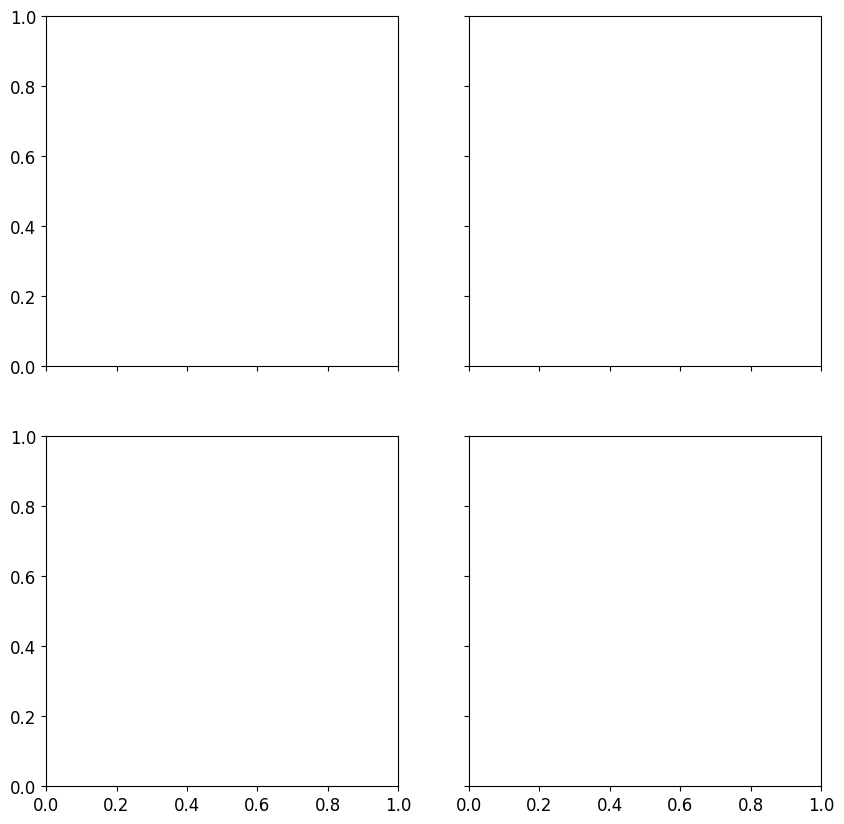

In [6]:
#4 panel figure

fig, axes = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)

#Panel 1: NN trained on TESS ages
plot_age_panel(axes[0, 0], df, SEIS_COL, NN_TESS_COL,
               'NN ages trained on TESS')

#Panel 2: NN trained on APOKASC-2 ages
plot_age_panel(axes[0, 1], df, SEIS_COL, NN_A2_COL,
               'NN ages trained on APOKASC-2')

#Panel 3: NN trained on APOKASC-3 ages
plot_age_panel(axes[1, 0], df, SEIS_COL, NN_A3_COL,
               'NN ages trained on APOKASC-3')

#Panel 4: NN trained on APO-K2 ages
plot_age_panel(axes[1, 1], df, SEIS_COL, NN_APOK2_COL,
               'NN ages trained on APO-K2')

#labels
axes[0,1].set_ylabel('')
axes[1,1].set_ylabel('')

#shared legend in the upper-left panel
handles, labels = axes[0,0].get_legend_handles_labels()
axes[0,0].legend(handles, labels, loc='upper left')

plt.tight_layout()

#save
plt.savefig('Fig3_NN_testsets_seis_vs_pred_age.pdf', dpi=600, bbox_inches='tight')
plt.show()
